<a href="https://colab.research.google.com/github/segnig/African-Credit-Scoring-Challenge/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# File loading

In [1]:
FILE_PATH = "/content/drive/MyDrive/Data Science/african-credit-scoring-challenge20241203-14702-1yayxml/"

## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")

### Load data to dataframe

In [3]:
train = pd.read_csv(FILE_PATH + "Train.csv")
test = pd.read_csv(FILE_PATH + "Test.csv")

ss = pd.read_csv(FILE_PATH + "SampleSubmission.csv")

## Train DataFrame

In [4]:
train.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


In [5]:
var_def = FILE_PATH + "VariableDefinitions.txt"

Variable_definitions = {}
with open(var_def, "r") as f:
    for line in f.readlines():
        line = line.strip()
        line = line.split(": ")
        if len(line) == 2:
            Variable_definitions[line[0].split("**")[1]] = line[1]

Variable_definitions

{'ID': 'A unique identifier for each entry in the dataset.',
 'customer_id': 'Unique identifier for each customer in the dataset.',
 'country_id': 'Identifier or code representing the country where the customer resides or where the loan was issued.',
 'tbl_loan_id': 'Unique identifier for each loan associated with the customer.',
 'Total_Amount': 'The total loan amount initially disbursed to the customer.',
 'Total_Amount_to_Repay': 'The total amount the customer is expected to repay, including principal, interest, and fees.',
 'loan_type': 'The category or type of loan.',
 'disbursement_date': 'The date when the loan amount was disbursed to the customer.',
 'duration': 'The length of the loan term, typically expressed in days',
 'lender_id': 'Unique identifier for the lender or institution that issued the loan.',
 'New_versus_Repeat': 'Indicates whether the loan is the customer\'s first loan ("New") or if the customer has taken loans before ("Repeat").',
 'Amount_Funded_By_Lender': 'T

In [6]:
# dataset informations
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

In [7]:
train["target"].value_counts()

,count
target,
0,67396
1,1258


In [8]:
# numbers of values per features

for col in train.columns:
    print(f"{col}: {train[col].nunique()}")

ID: 68654
customer_id: 6540
country_id: 1
tbl_loan_id: 66520
lender_id: 4
loan_type: 22
Total_Amount: 19076
Total_Amount_to_Repay: 21920
disbursement_date: 768
due_date: 893
duration: 64
New_versus_Repeat: 2
Amount_Funded_By_Lender: 23391
Lender_portion_Funded: 12844
Lender_portion_to_be_repaid: 9791
target: 2


In [9]:
# dropped features
dropped_features = ["country_id"]

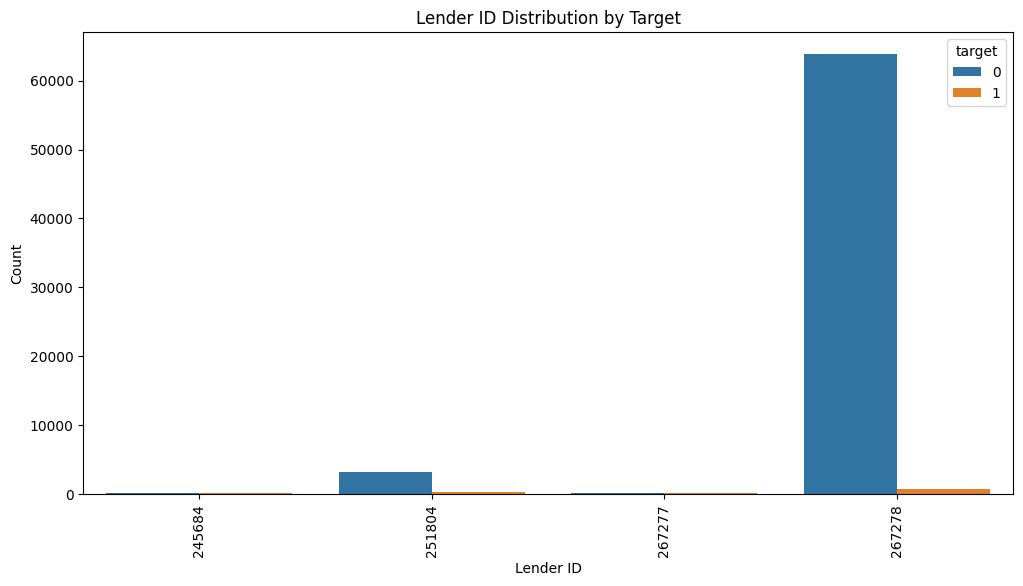

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(
    data=train,
    x="lender_id",
    hue="target",
    ax=ax
)

plt.xticks(rotation=90)
plt.xlabel("Lender ID")
plt.ylabel("Count")
plt.title("Lender ID Distribution by Target")

plt.show()

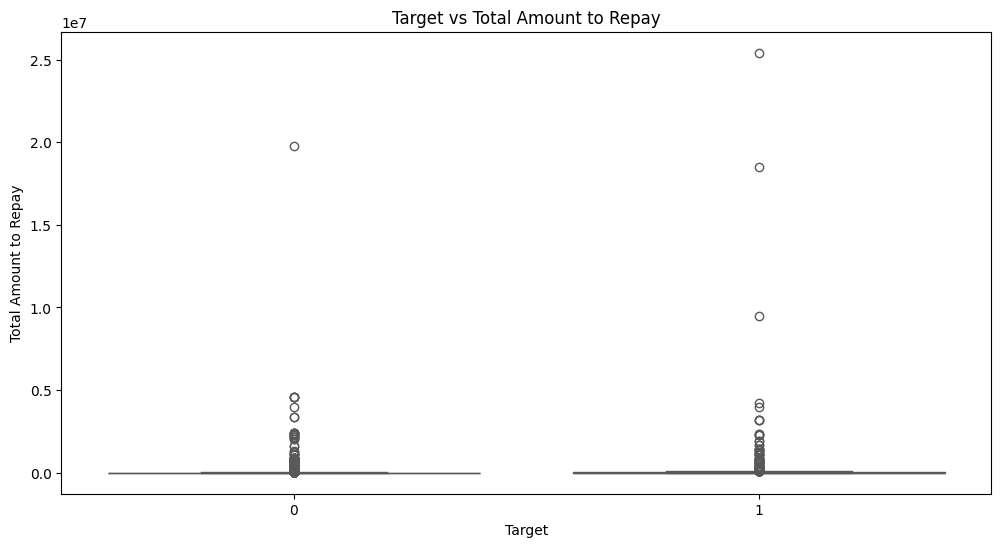

In [11]:
# Target vd 'Total_Amount_to_Repay' box'plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    data=train,
    x="target",
    y="Total_Amount_to_Repay",
    ax=ax,
    palette="Set2"
)

plt.xlabel("Target")
plt.ylabel("Total Amount to Repay")
plt.title("Target vs Total Amount to Repay")

plt.show();


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

In [13]:
Variable_definitions["country_id"]

'Identifier or code representing the country where the customer resides or where the loan was issued.'

In [14]:
train["country_id"].value_counts()

,count
country_id,
Kenya,68654


In [15]:
dropped_features

['country_id']

In [16]:
Variable_definitions["lender_id"]

'Unique identifier for the lender or institution that issued the loan.'

# `lender_id` : Unique identifier for the lender or institution that issued the loan.

In [17]:
train["lender_id"].value_counts()

,count
lender_id,
267278,64653
251804,3542
267277,271
245684,188


In [18]:
train_copy = train.copy()

In [19]:
# `lender_id` feature data type to string
train_copy["lender_id"] = train_copy["lender_id"].astype(str)

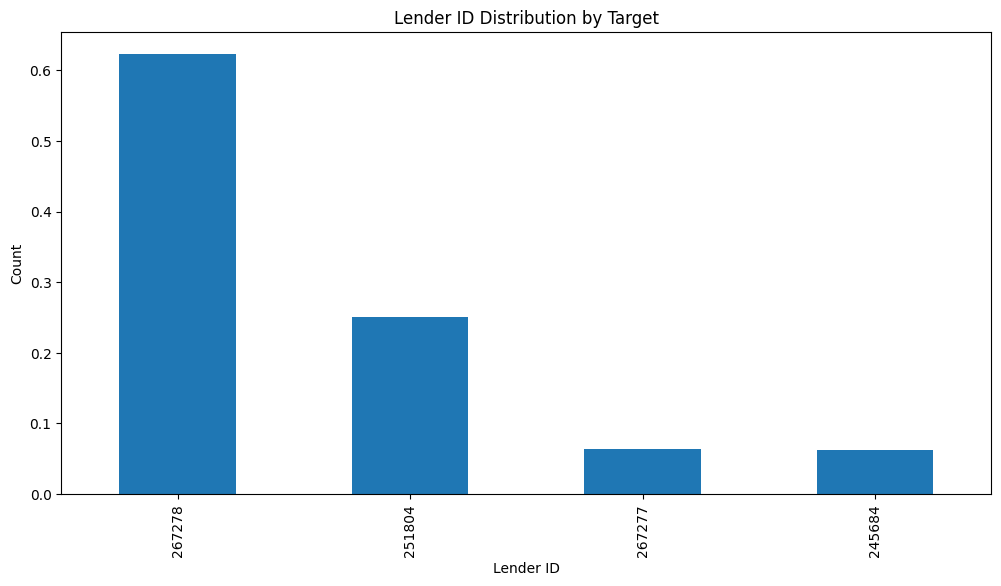

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))
train_copy[train_copy["target"] == 1]["lender_id"].value_counts(normalize=True).plot(kind="bar")

plt.xlabel("Lender ID")
plt.ylabel("Count")
plt.title("Lender ID Distribution by Target");


In [21]:
float64_features = train_copy.select_dtypes(include=["float64"]).columns

lender_id_vs_float64_features = train_copy.groupby(["lender_id", "target"])[float64_features].mean()

In [22]:
lender_id_vs_float64_features.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('245684', 0) to ('267278', 1)
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total_Amount                 8 non-null      float64
 1   Total_Amount_to_Repay        8 non-null      float64
 2   Amount_Funded_By_Lender      8 non-null      float64
 3   Lender_portion_Funded        8 non-null      float64
 4   Lender_portion_to_be_repaid  8 non-null      float64
dtypes: float64(5)
memory usage: 497.0+ bytes


In [23]:
lender_id_vs_float64_features

Total_Amount  Total_Amount_to_Repay  \
lender_id target                                         
245684    0       150380.745455          194503.622727   
          1         9909.615385           10993.384615   
251804    0        47022.891854           50334.345353   
          1        85839.330032           97069.334684   
267277    0        78734.507853           90197.063770   
          1       802468.448500          943870.609500   
267278    0        11029.485466           11283.912313   
          1        49481.821888           57409.277602   

                  Amount_Funded_By_Lender  Lender_portion_Funded  \
lender_id target                                                   
245684    0                   9938.845455               0.853455   
          1                   9544.871795               0.984825   
251804    0                   5777.128084               0.177999   
          1                   8363.938797               0.167886   
267277    0                  13724.280366               0.342604   
          1                  32858.081250               0.237091   
267278    0                   2161.224101               0.218420   
          1                  10672.146135               0.230304   

                  Lender_portion_to_be_repaid  
lender_id target                               
245684    0                      10671.109091  
          1                      10590.461538  
251804    0                       6217.916615  
          1                       9640.731013  
267277    0                      15191.298429  
          1                      41174.975000  
267278    0                       2209.979270  
          1                      12325.288265

In [24]:
# multi index to single index
lender_id_vs_float64_features.reset_index(inplace=True)

lender_id_vs_float64_features.set_index("lender_id", inplace=True)


In [25]:
lender_id_vs_float64_features

,target,Total_Amount,Total_Amount_to_Repay,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
lender_id,,,,,,
245684,0,150380.745455,194503.622727,9938.845455,0.853455,10671.109091
245684,1,9909.615385,10993.384615,9544.871795,0.984825,10590.461538
251804,0,47022.891854,50334.345353,5777.128084,0.177999,6217.916615
251804,1,85839.330032,97069.334684,8363.938797,0.167886,9640.731013
267277,0,78734.507853,90197.063770,13724.280366,0.342604,15191.298429
267277,1,802468.448500,943870.609500,32858.081250,0.237091,41174.975000
267278,0,11029.485466,11283.912313,2161.224101,0.218420,2209.979270
267278,1,49481.821888,57409.277602,10672.146135,0.230304,12325.288265


In [26]:
def plot_lender_id_vs_float64_feature( col, lender_id_vs_float64_features = lender_id_vs_float64_features):
    fig = plt.subplots(figsize=(8, 4))

    plt.plot(
        lender_id_vs_float64_features.index.unique(),
        lender_id_vs_float64_features[lender_id_vs_float64_features["target"] == 1][col],
        label=f"{col} Target=1",
        marker="o",
        linestyle="-",
        color="blue",
        markeredgecolor="black",
        markerfacecolor="white",
    )

    plt.plot(
        lender_id_vs_float64_features.index.unique(),
        lender_id_vs_float64_features[lender_id_vs_float64_features["target"] == 0][col],
        label=f"{col} Target=0",
        marker="o",
        linestyle="-",
        color="orange",
        markeredgecolor="black",
        markerfacecolor="white",

    )

    plt.xlabel("Lender ID")
    plt.ylabel(f"{col}")
    plt.title(f"{col} vs Lender ID")
    plt.legend()
    plt.grid(True)
    plt.show()

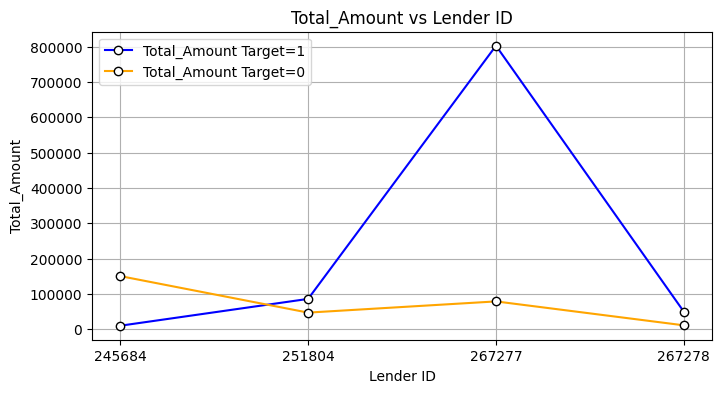

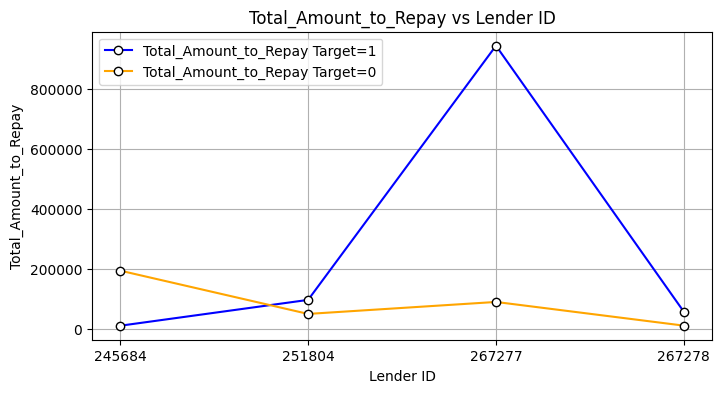

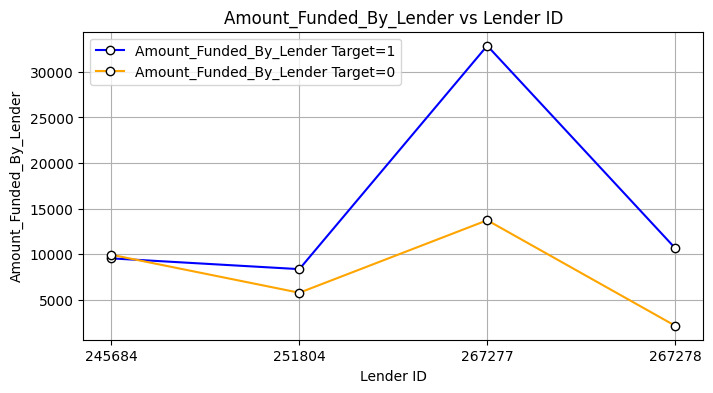

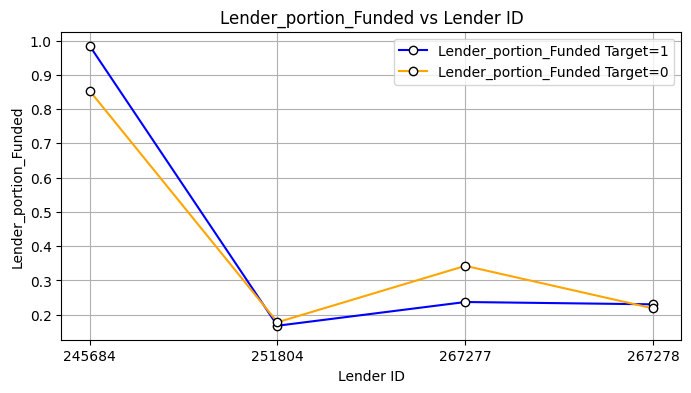

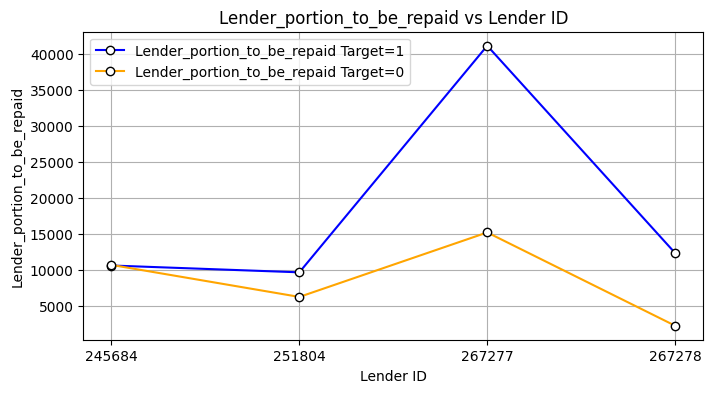

In [27]:
for col in float64_features:
    plot_lender_id_vs_float64_feature(col)

# How data disturbuted over Lender ID?

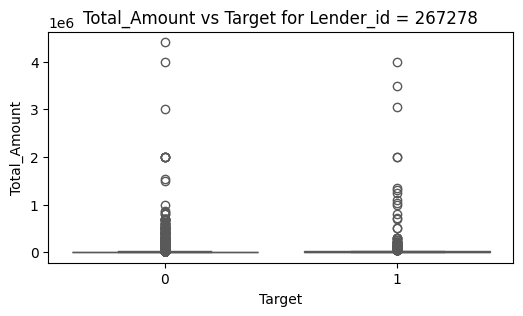

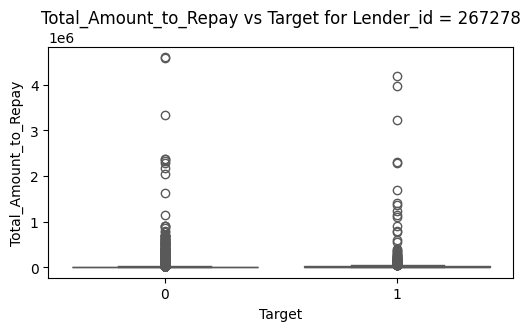

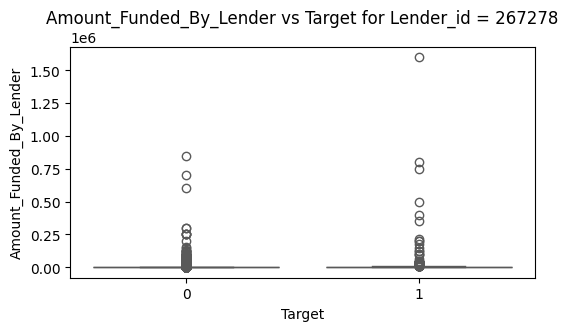

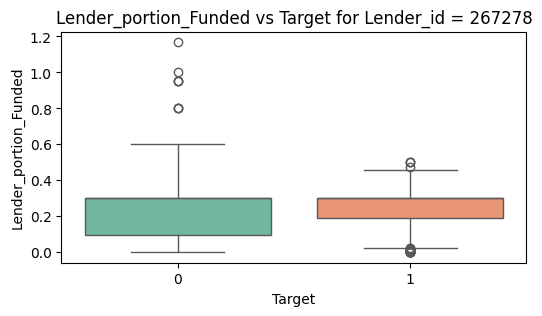

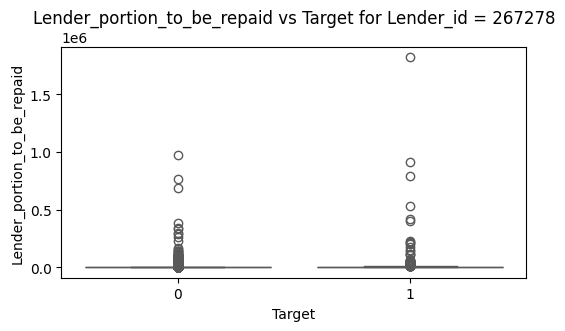

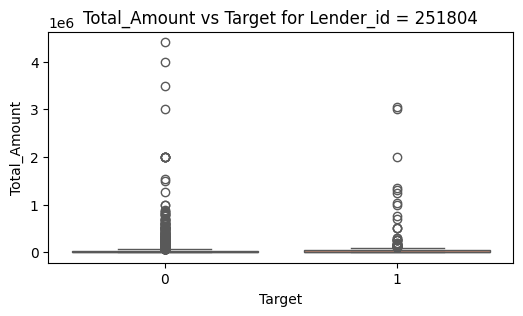

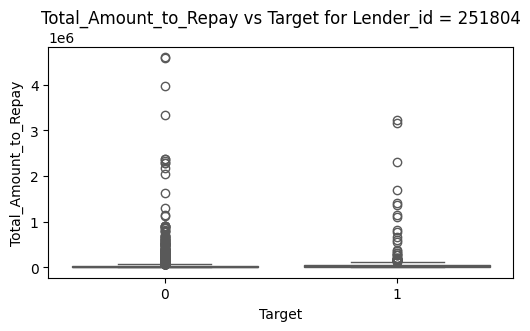

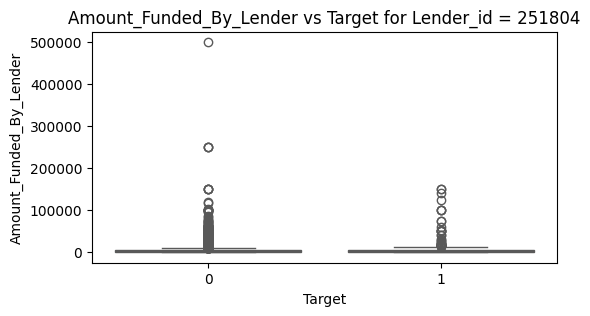

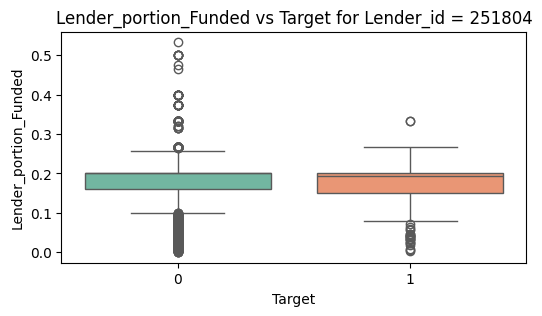

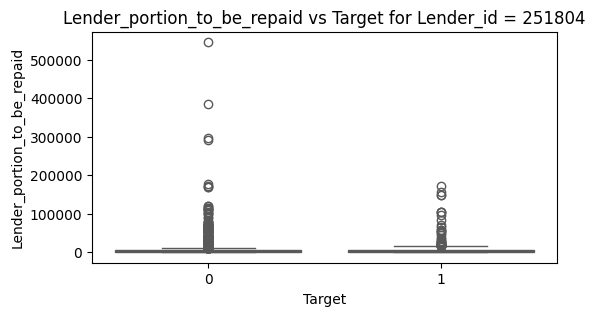

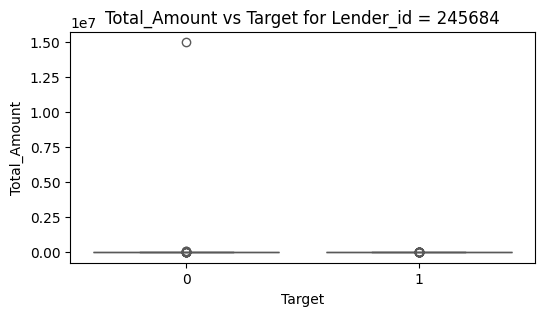

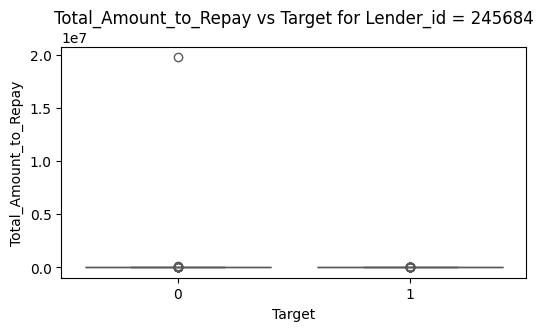

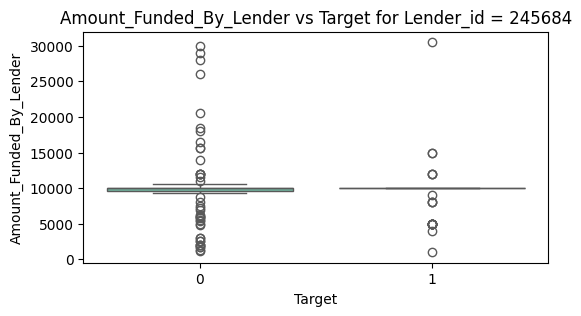

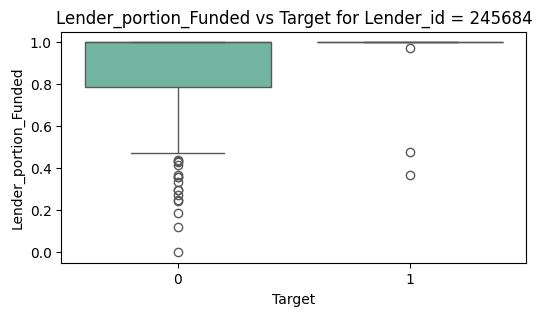

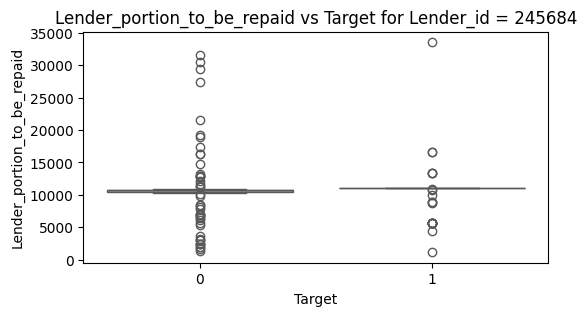

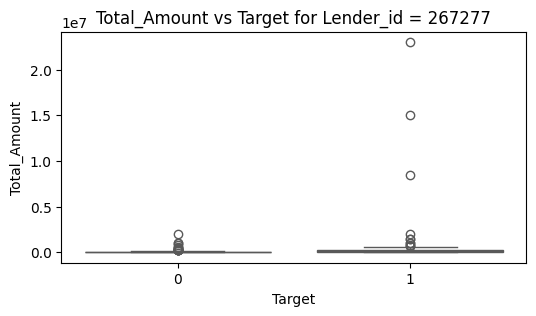

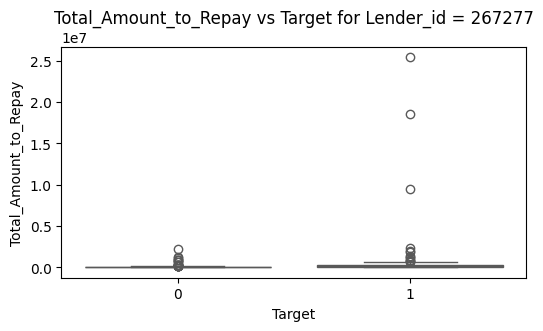

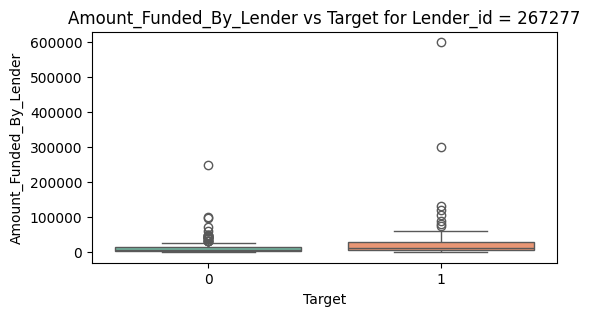

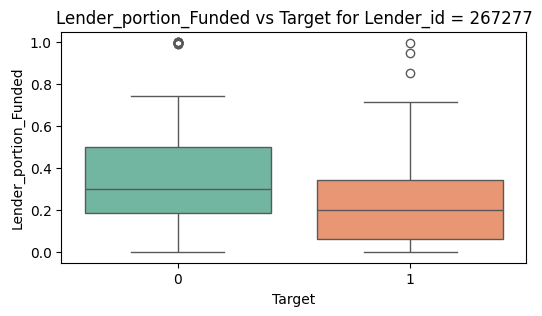

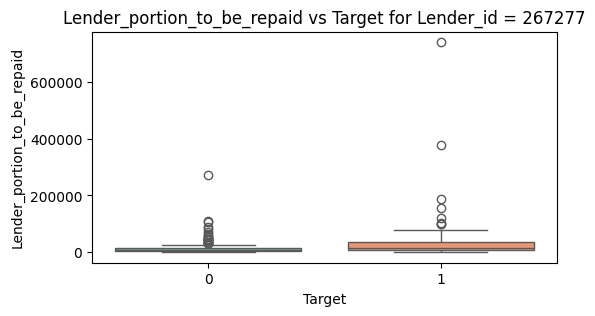

In [28]:
# distibution the data over Lende_id
for id in train_copy["lender_id"].unique():

    for col in float64_features:
        fig, ax = plt.subplots(figsize=(6, 3))
        sns.boxplot(
            data=train_copy[train_copy["lender_id"] == id],
            x="target",
            y=col,
            ax=ax,
            palette="Set2"
        )
        plt.xlabel("Target")
        plt.ylabel(f"{col}")
        plt.title(f"{col} vs Target for Lender_id = {id}")
        plt.show();

# Target vs




*   `Total_Amount` => The total loan amount initially disbursed to the customer.
*   `Total_Amount_to_Repay` => The total amount the customer is expected to repay, including principal, interest, and fees.
*   `Amount_Funded_By_Lender` => The portion of the loan funded directly by the lender.
*   `Lender_portion_Funded` => Percentage of the total loan amount funded by the lender.
*   `Lender_portion_to_be_repaid` => The portion of the outstanding loan that needs to be repaid to the lender.






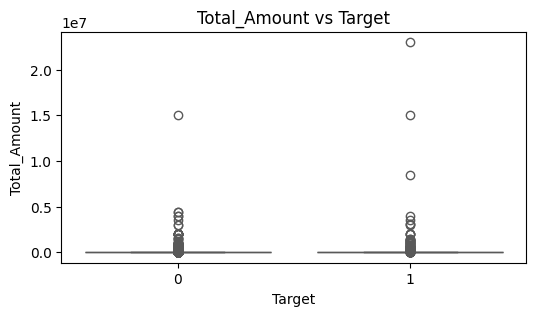

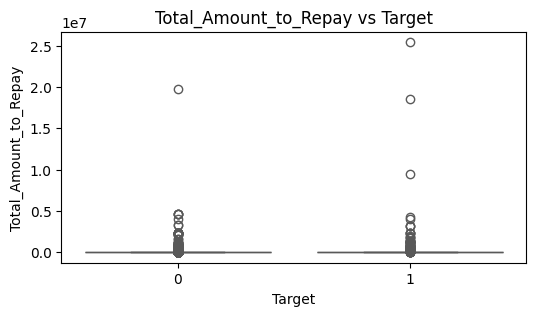

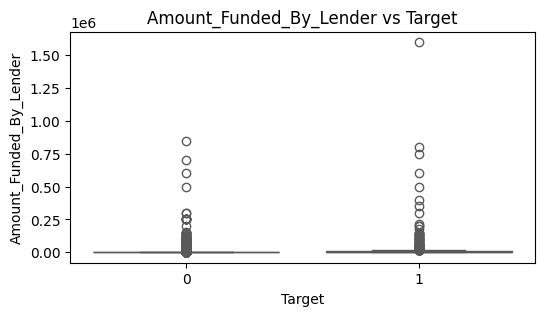

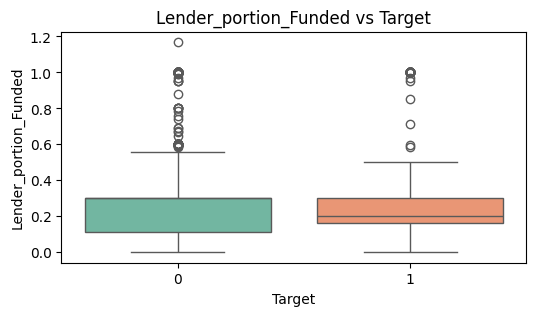

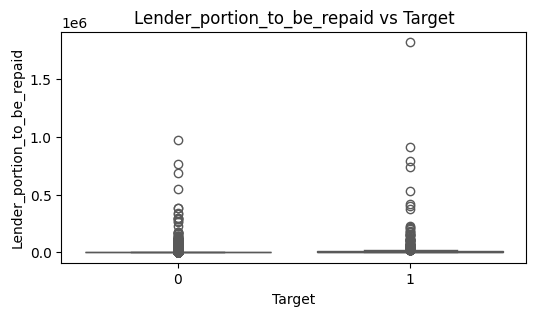

In [29]:
for col in float64_features:
    fig, ax = plt.subplots(figsize=(6, 3))
    sns.boxplot(
        data=train_copy,
        x="target",
        y=col,
        ax=ax,
        palette="Set2"
    )
    plt.xlabel("Target")
    plt.ylabel(f"{col}")
    plt.title(f"{col} vs Target")
    plt.show();

In [30]:
for col in Variable_definitions:
    print(col, "=>", Variable_definitions[col])

ID => A unique identifier for each entry in the dataset.
customer_id => Unique identifier for each customer in the dataset.
country_id => Identifier or code representing the country where the customer resides or where the loan was issued.
tbl_loan_id => Unique identifier for each loan associated with the customer.
Total_Amount => The total loan amount initially disbursed to the customer.
Total_Amount_to_Repay => The total amount the customer is expected to repay, including principal, interest, and fees.
loan_type => The category or type of loan.
disbursement_date => The date when the loan amount was disbursed to the customer.
duration => The length of the loan term, typically expressed in days
lender_id => Unique identifier for the lender or institution that issued the loan.
New_versus_Repeat => Indicates whether the loan is the customer's first loan ("New") or if the customer has taken loans before ("Repeat").
Amount_Funded_By_Lender => The portion of the loan funded directly by the l

# Loan Type

In [31]:
df_loan_type_t1 = train_copy[train_copy["target"] == 1].groupby("loan_type")[float64_features].mean()

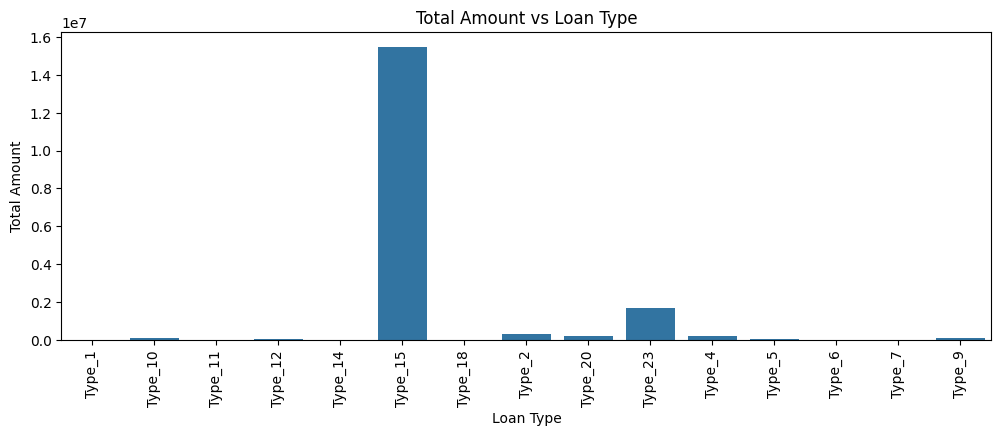

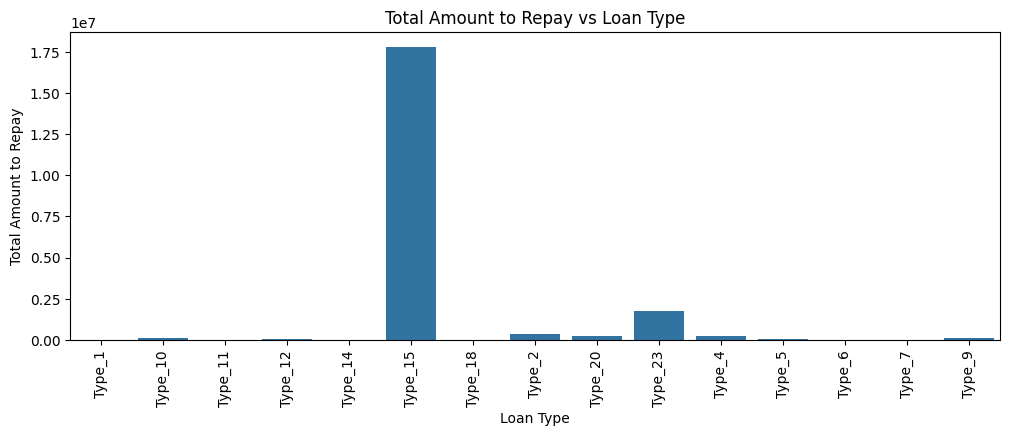

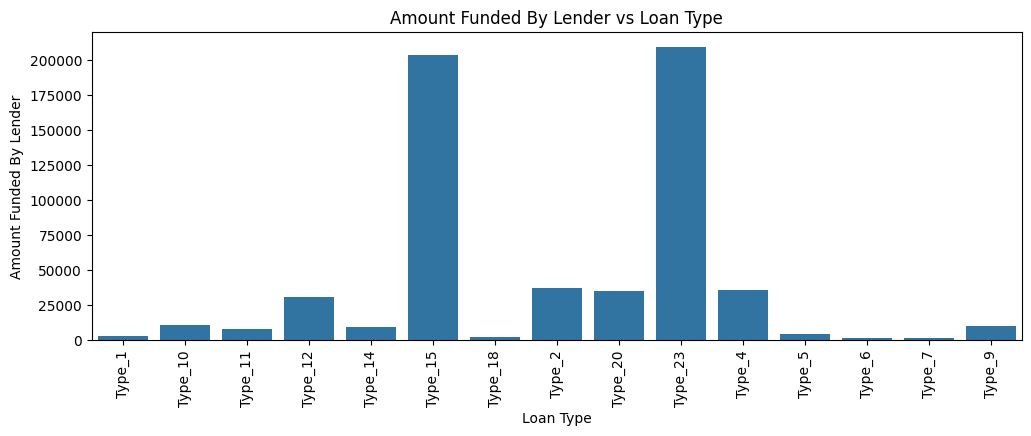

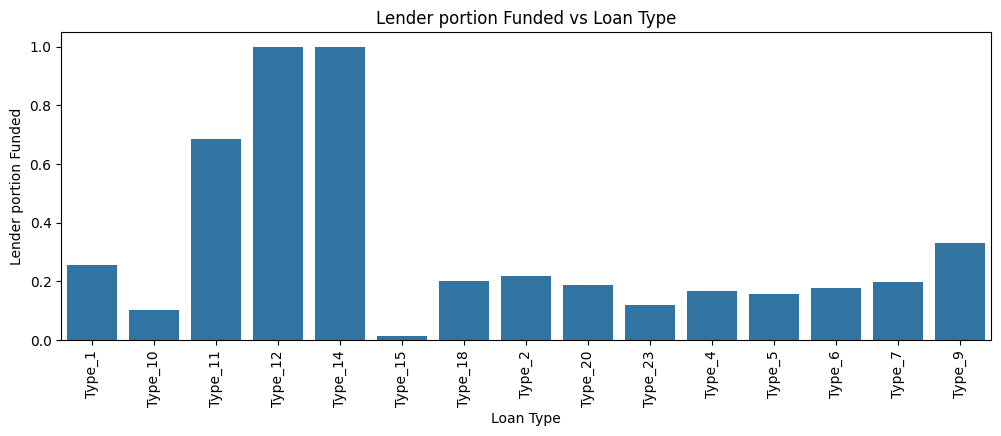

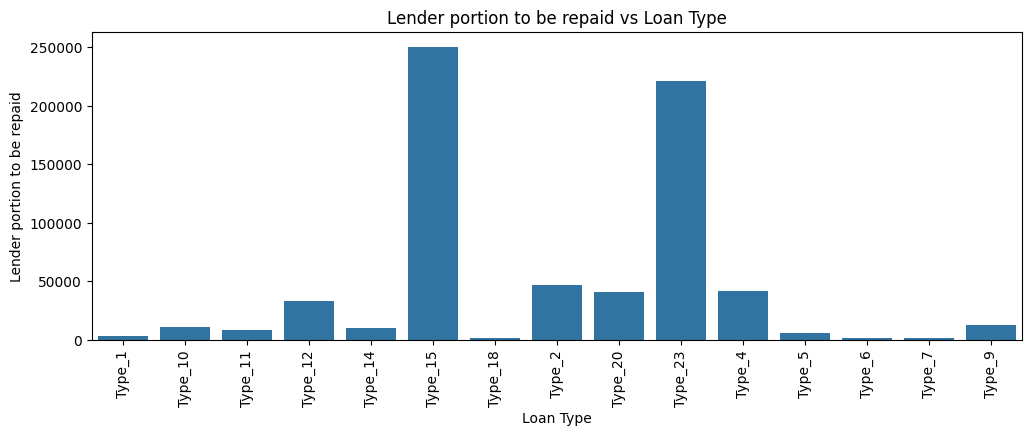

In [32]:
for col in float64_features:
    fig, ax = plt.subplots(figsize=(12, 4))

    sns.barplot(
        data=df_loan_type_t1,
        x=df_loan_type_t1.index,
        y=col,
        ax=ax,
    )

    plt.xlabel("Loan Type")
    plt.xticks(rotation=90)
    plt.ylabel(f"{' '.join(col.split('_'))}")
    plt.title(f"{' '.join(col.split('_'))} vs Loan Type")
    plt.show();

In [33]:
Variable_definitions

{'ID': 'A unique identifier for each entry in the dataset.',
 'customer_id': 'Unique identifier for each customer in the dataset.',
 'country_id': 'Identifier or code representing the country where the customer resides or where the loan was issued.',
 'tbl_loan_id': 'Unique identifier for each loan associated with the customer.',
 'Total_Amount': 'The total loan amount initially disbursed to the customer.',
 'Total_Amount_to_Repay': 'The total amount the customer is expected to repay, including principal, interest, and fees.',
 'loan_type': 'The category or type of loan.',
 'disbursement_date': 'The date when the loan amount was disbursed to the customer.',
 'duration': 'The length of the loan term, typically expressed in days',
 'lender_id': 'Unique identifier for the lender or institution that issued the loan.',
 'New_versus_Repeat': 'Indicates whether the loan is the customer\'s first loan ("New") or if the customer has taken loans before ("Repeat").',
 'Amount_Funded_By_Lender': 'T

# `Total_Amount` vs `Total_Amount_to_Repay`

> How The total loan amount initially disbursed to the customer and The total amount the customer is expected to repay, including principal, interest, and fees are releated?




In [34]:
corr_total_amount_vs_to_repay = train_copy[["Total_Amount", "Total_Amount_to_Repay"]].corr()
corr_total_amount_vs_to_repay

,Total_Amount,Total_Amount_to_Repay
Total_Amount,1.000000,0.996759
Total_Amount_to_Repay,0.996759,1.000000


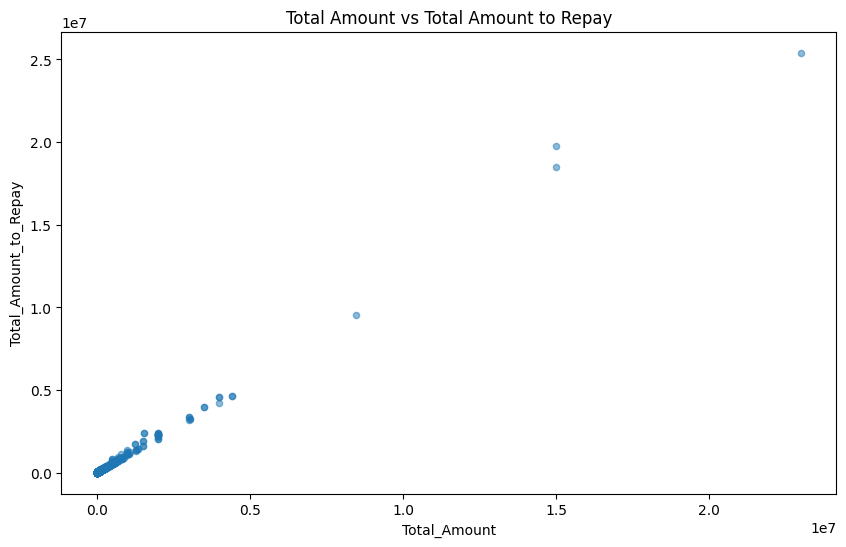

In [35]:
train_copy[["Total_Amount", "Total_Amount_to_Repay"]].plot(
    kind="scatter",
    x="Total_Amount",
    y="Total_Amount_to_Repay",
    alpha=0.5,
    figsize=(10, 6)
)
plt.xlabel("Total_Amount")
plt.ylabel("Total_Amount_to_Repay")
plt.title("Total Amount vs Total Amount to Repay")
plt.show();


# `Distribution of Loan Types: New vs. Repeat Borrowers`

Text(0.5, 1.0, 'Distribution of Loan Types: New vs. Repeat Borrowers')

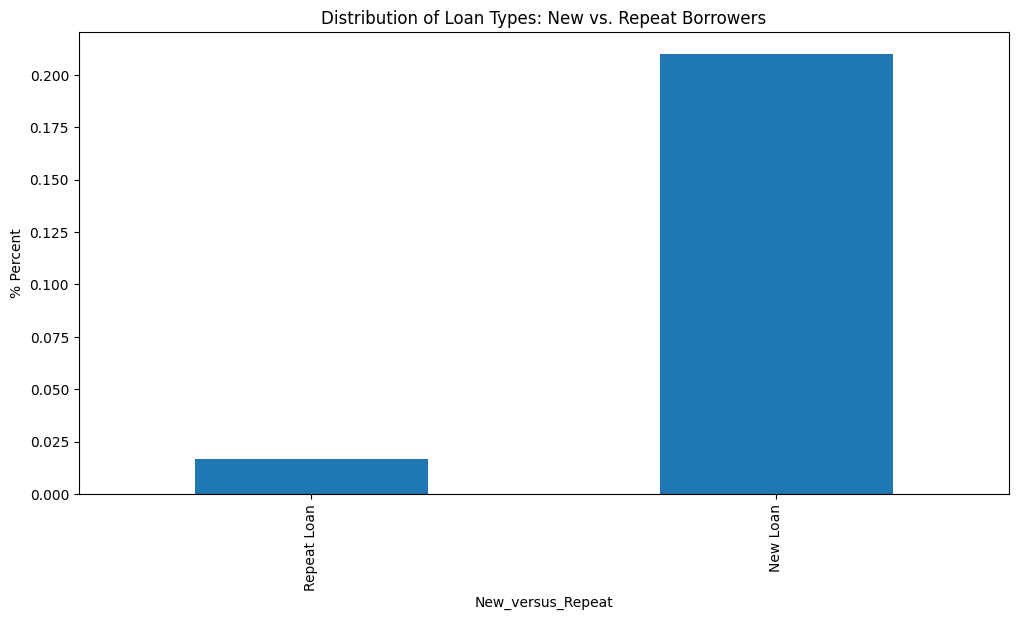

In [36]:
fig = plt.subplots(figsize=(12, 6))
(
    train_copy[train_copy["target"] == 1]["New_versus_Repeat"].value_counts() / train_copy["New_versus_Repeat"].value_counts()
).plot(kind="bar")

plt.xlabel("New_versus_Repeat")
plt.ylabel("% Percent")
plt.title("Distribution of Loan Types: New vs. Repeat Borrowers")


Text(0.5, 1.0, 'Loan Amount Distribution: Comparing New vs. Repeat Borrowers')

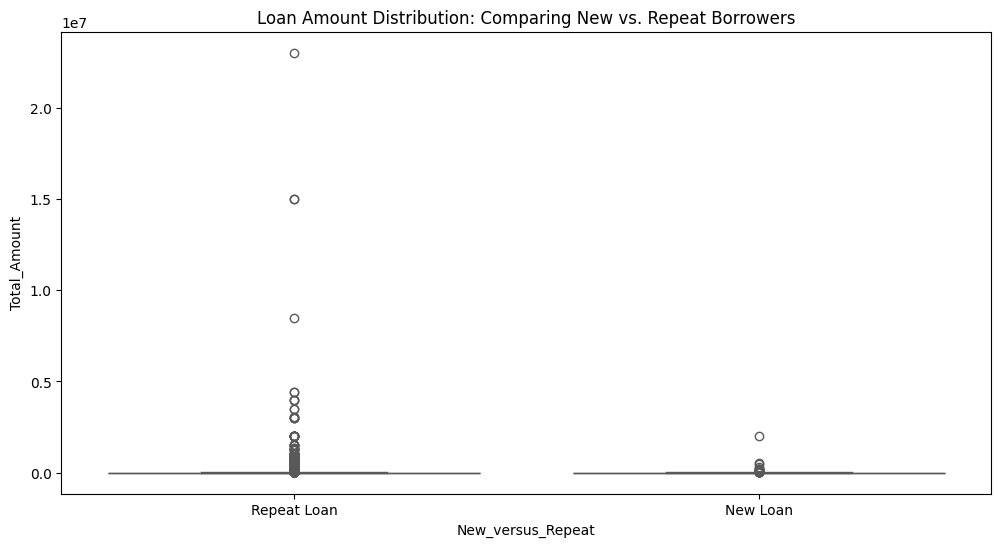

In [37]:
# Boxplot the distrubution of total amount over Distribution of Loan Types: New vs. Repeat Borrowers
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    data=train_copy,
    x="New_versus_Repeat",
    y="Total_Amount",
    ax=ax,
    palette="Set2"
)

plt.xlabel("New_versus_Repeat")
plt.ylabel("Total_Amount")
plt.title("Loan Amount Distribution: Comparing New vs. Repeat Borrowers")

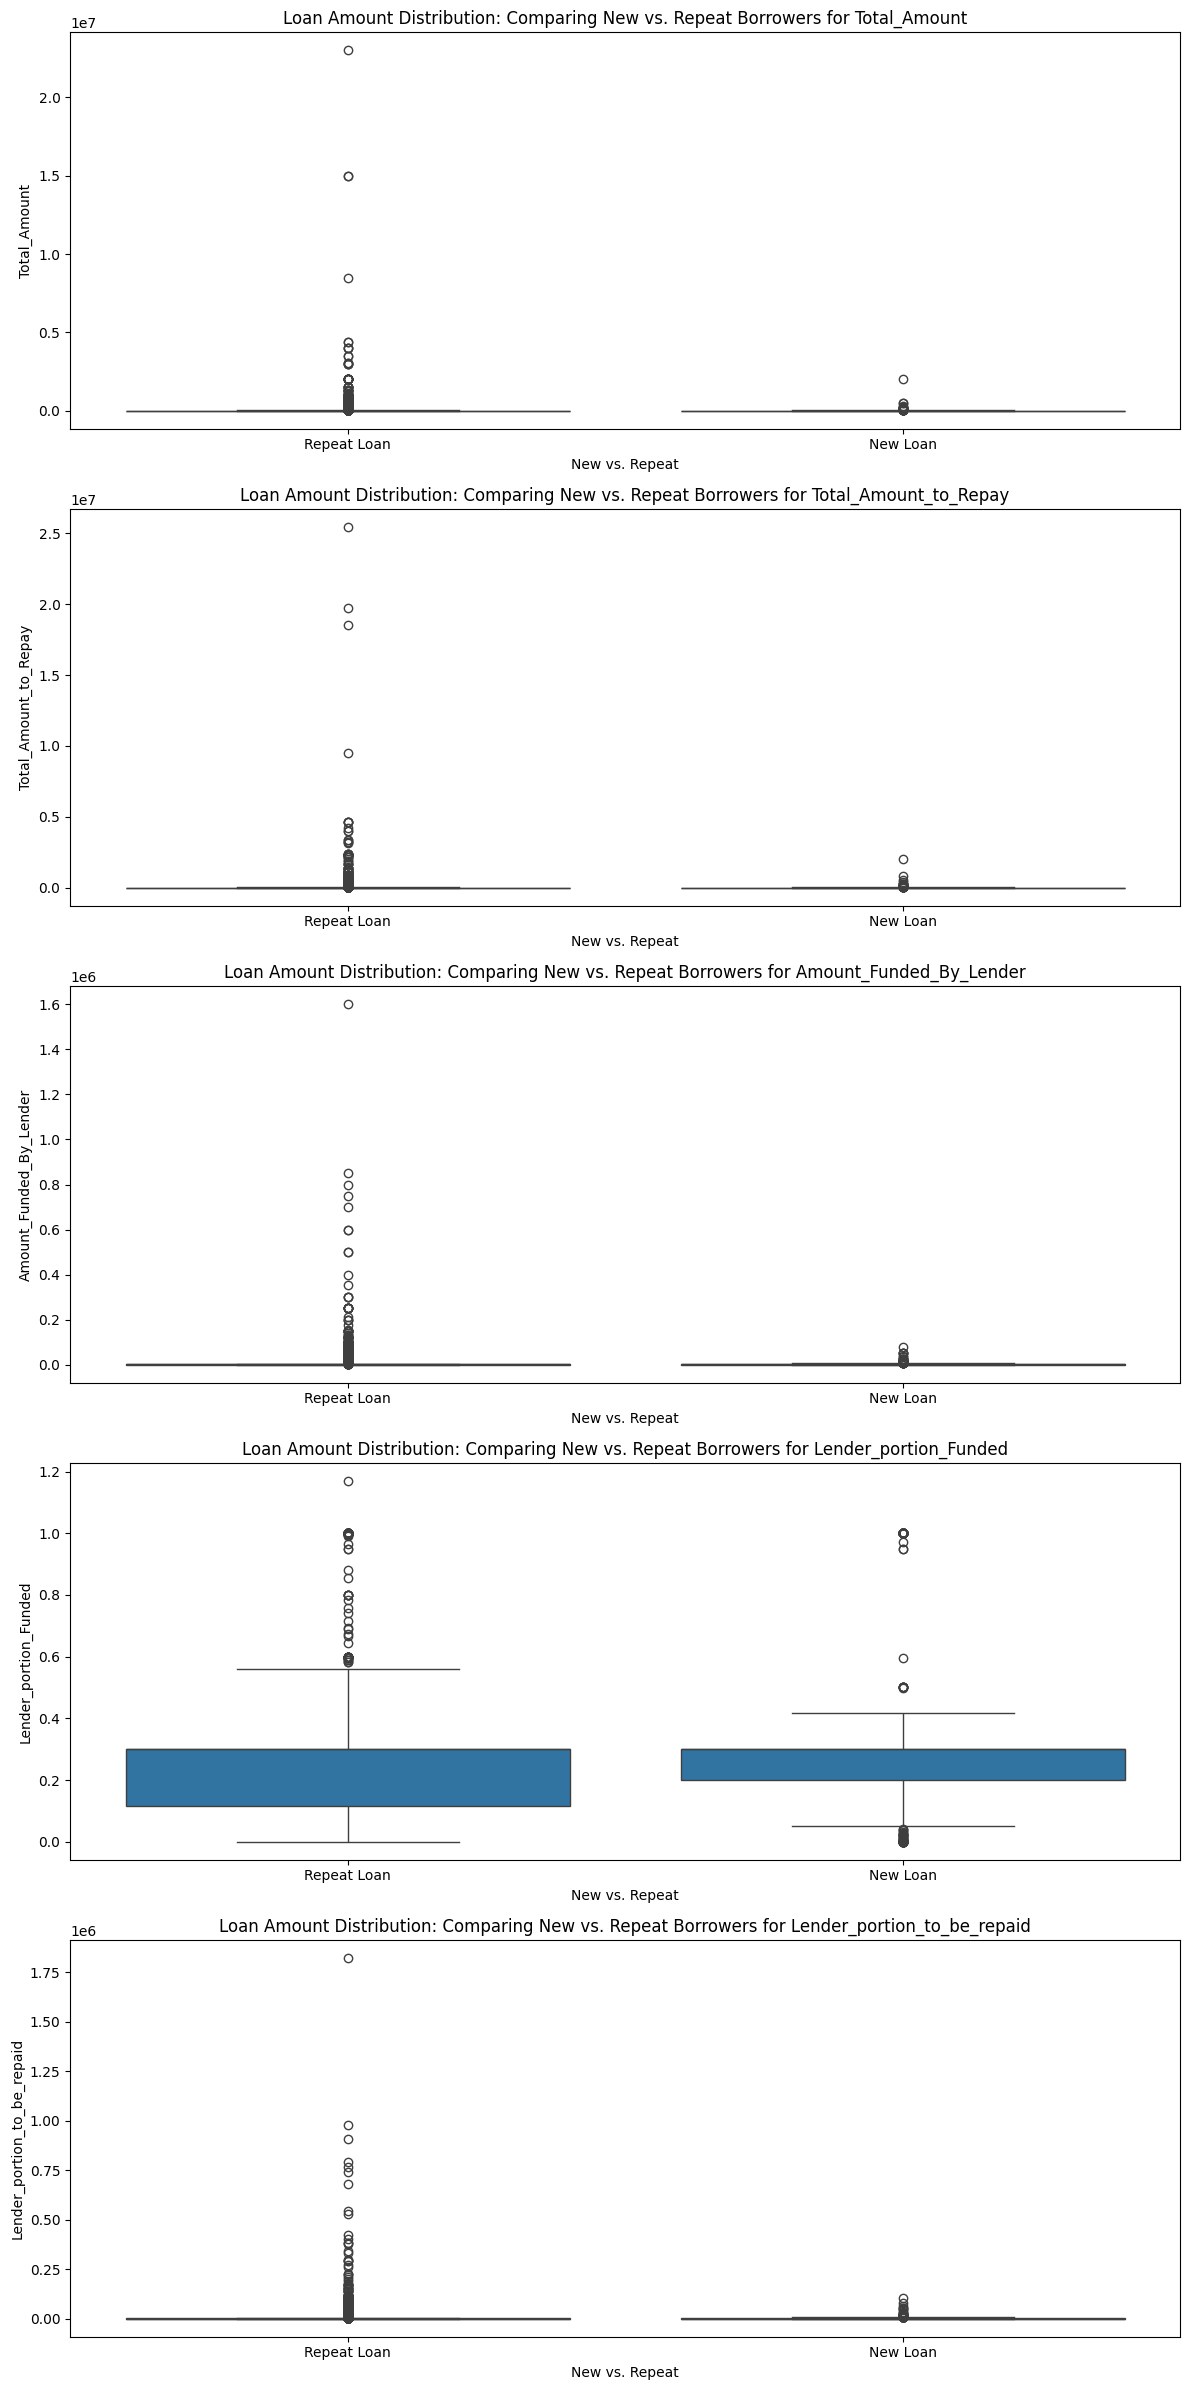

In [38]:
fig, axes = plt.subplots(len(float64_features), 1, figsize=(12, 24))  # Create one column of subplots

for i, col in enumerate(float64_features):
    sns.boxplot(
        data=train_copy,
        x="New_versus_Repeat",
        y=col,
        ax=axes[i]
    )
    axes[i].set_title(f"Loan Amount Distribution: Comparing New vs. Repeat Borrowers for {col}")
    axes[i].set_xlabel("New vs. Repeat")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Loan Application Success Ratio: How Many Actually Take the Loan?')

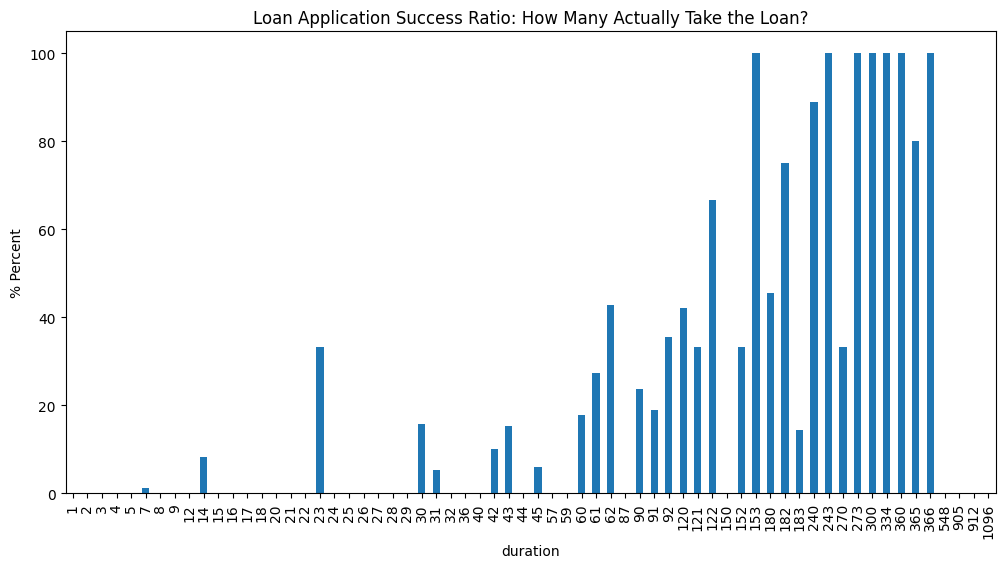

In [39]:
duration_df = train_copy[train_copy["target"] == 1]["duration"].value_counts() / train_copy["duration"].value_counts() * 100

fig = plt.subplots(figsize=(12, 6))

duration_df.fillna(0, inplace=True)
duration_df.plot(kind="bar")

plt.xlabel("duration")
plt.ylabel("% Percent")
plt.title("Loan Application Success Ratio: How Many Actually Take the Loan?")

In [40]:
Variable_definitions["duration"]

'The length of the loan term, typically expressed in days'

In [41]:
train_copy["Lender_portion_Funded"].describe()

,Lender_portion_Funded
count,68654.000000
mean,0.218679
std,0.129832
min,0.000000
25%,0.118712
50%,0.300000
75%,0.300000
max,1.168119


## ⏳ Duration Feature ⏳

💡 **Important:**  
The `duration` feature represents the **number of days from the disbursement date to the due date**.  
- 🕒 Longer durations may lower default risk but increase lender exposure.  
- ⚠️ Check for **missing** or **negative** durations and handle appropriately!


In [45]:
# due_date and disbursement_date to datetime

train_copy["due_date"] = pd.to_datetime(train_copy["due_date"])
train_copy["disbursement_date"] = pd.to_datetime(train_copy["disbursement_date"])

In [55]:
((train_copy["due_date"] - train_copy["disbursement_date"]).dt.days != train_copy["duration"]).sum()

0

## Duration Feature: Key Insight

The `duration` feature represents the **number of days between the loan disbursement date and the due date**.  
- 🎯 **Clean Data**: There are no missing or mismatched values for this feature.  
- 🔍 **Model Impact**: Duration can strongly influence repayment behavior.  
   - Longer durations may indicate more lenient loan terms but could also correlate with lower repayment rates.  
   - Shorter durations might represent stricter repayment schedules and higher borrower pressure.  
- 📊 Consider analyzing trends in default rates (target variable) based on `duration` groups.


In [56]:
train_copy["due_date"].describe()

,due_date
count,68654
mean,2022-10-25 20:59:15.638418944
min,2021-10-21 00:00:00
25%,2022-08-17 00:00:00
50%,2022-09-23 00:00:00
75%,2022-10-31 00:00:00
max,2025-10-27 00:00:00


In [57]:
train_copy["disbursement_date"].describe()

,disbursement_date
count,68654
mean,2022-10-17 07:55:03.417135360
min,2021-10-04 00:00:00
25%,2022-08-10 00:00:00
50%,2022-09-16 00:00:00
75%,2022-10-24 00:00:00
max,2024-11-14 00:00:00


In [62]:
# Extract "month-year" for disbursement_date and due_date
train_copy["disbursement_date_month_year"] = train_copy["disbursement_date"].dt.strftime('%Y-%m')
train_copy["due_date_month_year"] = train_copy["due_date"].dt.strftime('%Y-%m')


In [83]:
due_month_year_df = train_copy.groupby(["due_date_month_year", "target"])[float64_features].mean()
disbursement_month_year_df = train_copy.groupby(["disbursement_date_month_year", "target"])[float64_features].mean()

# set due_date_month_year to index
due_month_year_df.reset_index(inplace=True)
disbursement_month_year_df.reset_index(inplace=True)

due_month_year_df.set_index("due_date_month_year", inplace=True)
disbursement_month_year_df.set_index("disbursement_date_month_year", inplace=True)

due_month_year_df.head()

,target,Total_Amount,Total_Amount_to_Repay,Amount_Funded_By_Lender,Lender_portion_to_be_repaid
due_date_month_year,,,,,
2021-10,0,12800.000000,13523.000000,12800.000000,13523.000000
2021-11,0,12800.000000,13373.000000,12800.000000,13373.000000
2021-12,0,11845.000000,12498.166667,9138.333333,9687.444444
2021-12,1,9571.428571,10631.500000,9571.428571,10631.500000
2022-01,0,11857.142857,12592.857143,9157.142857,9733.857143


In [79]:
float64_features = float64_features.to_list()

float64_features.remove("Lender_portion_Funded")

# 📅 Due Date Analysis  
### 📊 Exploring:  
- **Total Amount**  
- **Total Amount to Repay**  
- **Amount Funded by Lender**  
- **Lender Portion to Be Repaid**  


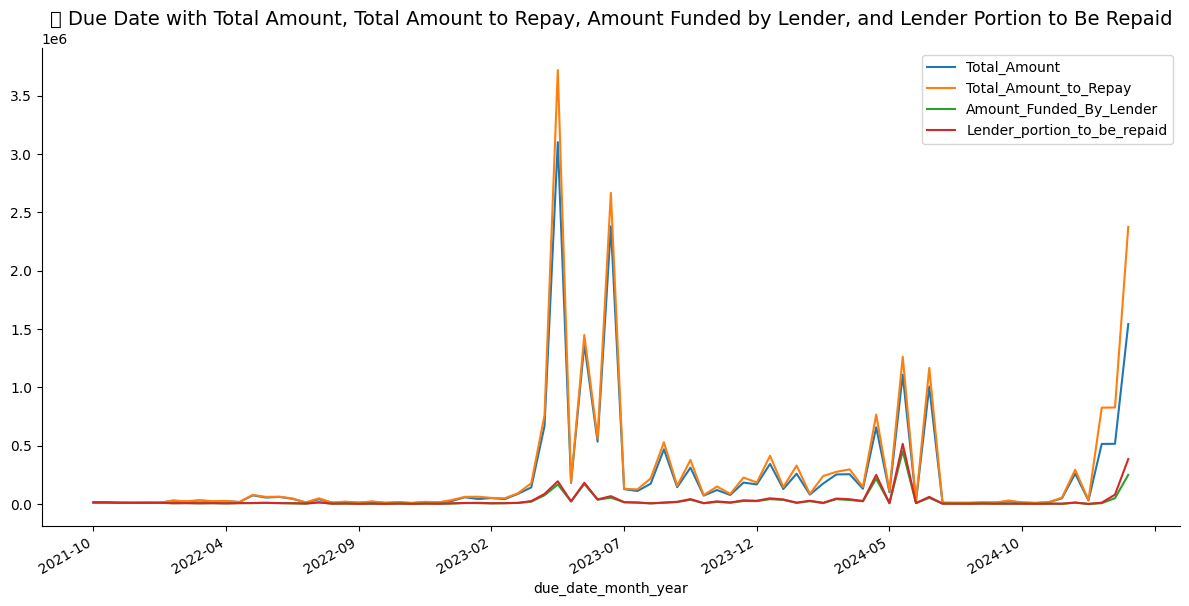

In [85]:
# @title For all dataset
fig, ax = plt.subplots(figsize=(12, 6))



for col in float64_features:
    due_month_year_df[col].plot(kind='line', ax=ax, title=f'{col}')
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.legend()
    fig.autofmt_xdate()

fig.tight_layout()
plt.title("📅 Due Date with Total Amount, Total Amount to Repay, Amount Funded by Lender, and Lender Portion to Be Repaid", fontsize=14)
plt.show()

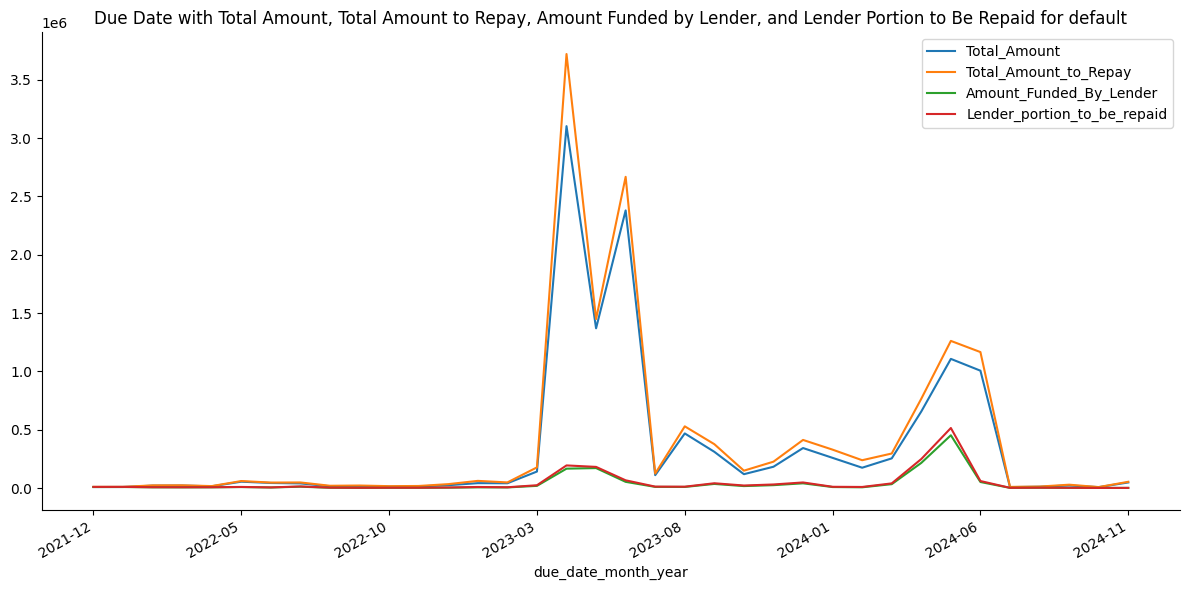

In [87]:
# @title For all dataset
fig, ax = plt.subplots(figsize=(12, 6))



for col in float64_features:
    due_month_year_df[due_month_year_df["target"] == 1][col].plot(kind='line', ax=ax, title=f'{col}')
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.legend()
    fig.autofmt_xdate()

fig.tight_layout()
plt.title("Due Date with Total Amount, Total Amount to Repay, Amount Funded by Lender, and Lender Portion to Be Repaid for default")
plt.show()

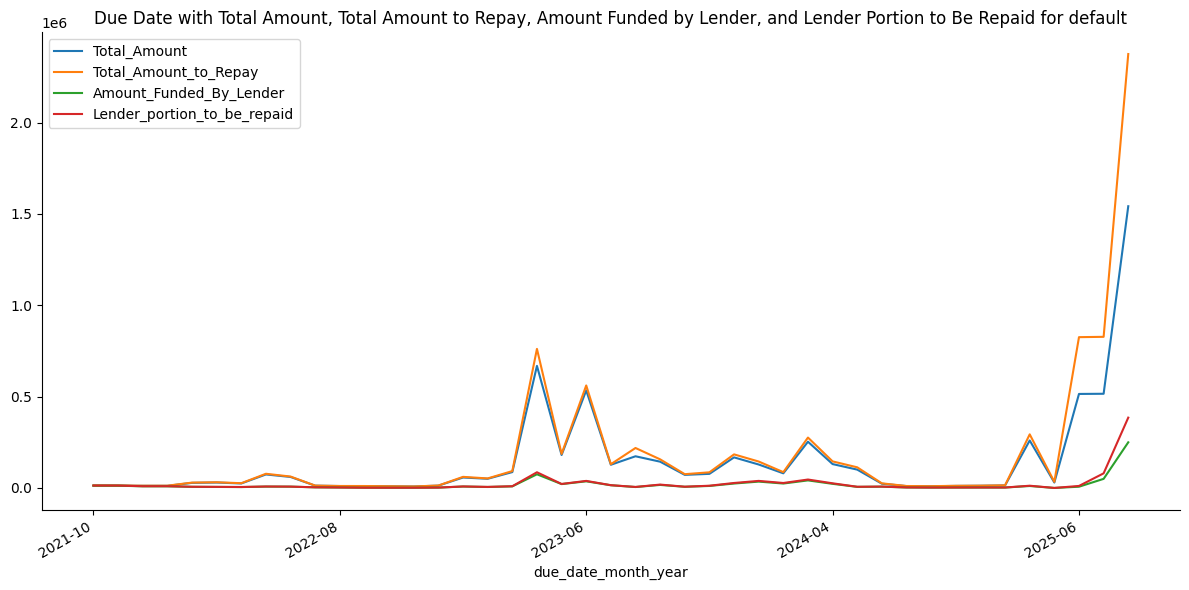

In [88]:
fig, ax = plt.subplots(figsize=(12, 6))



for col in float64_features:
    due_month_year_df[due_month_year_df["target"] == 0][col].plot(kind='line', ax=ax, title=f'{col}')
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.legend()
    fig.autofmt_xdate()

fig.tight_layout()
plt.title("Due Date with Total Amount, Total Amount to Repay, Amount Funded by Lender, and Lender Portion to Be Repaid for default")
plt.show()

# Feature Engineering

$$interest\ amount + fees = Total\_Amount\_to\_Repay - Total\_Amount$$

Assume the amount fees is too small
  

### Interest Rate Formula

$$
\text{interest_rate} = \frac{\text{Total_Amount_to_Repay} - \text{Total_Amount}}{\text{Total_Amount}}
$$

Where:  
- `Total_Amount`: The principal loan amount disbursed.  
- `Total_Amount_to_Repay`: The total repayment amount, including principal, interest, and fees.  
- `interest_rate`: The fraction of the loan principal charged as interest and fees.



## Calculate Days to due date
$$days\_to\_due\_date = due\_date - disbursement\_date$$


In [43]:
train_copy["interest_rate"] = (train_copy["Total_Amount_to_Repay"] - train_copy["Total_Amount"]) / train_copy["Total_Amount"]

In [44]:
train_copy[train_copy["target"] == 0]["interest_rate"].describe()

,interest_rate
count,67396.000000
mean,0.016825
std,0.030501
min,-1.000000
25%,0.000000
50%,0.007610
75%,0.029155
max,0.713699
